# Bayesian decision theory and parametric methods

This is an attempt to implement the programming tasks from Week36 - called Excersise set 3.


First out is (2a). Some inspiration collected from ChatGPT.

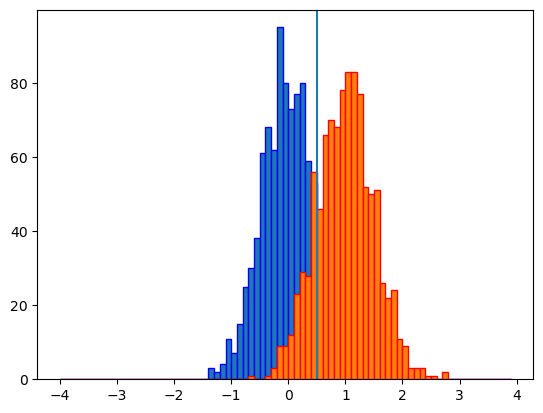

| 843 157 |
| 171 829 |


In [21]:
from math import sqrt, pi, exp
from scipy.stats import uniform, norm
import matplotlib.pyplot as plt
import numpy as np

class Bayesian:

    def __init__(self ,prior_A, prior_B) :
        # define the prior probabilities
        self._prior_A = prior_A
        self._prior_B = prior_B
        self._mu_A = 0
        self._mu_B = 1
        self._sigma_A = 0.5
        self._sigma_B = 0.5

    # define the class likelihood functions as normal distributions
    def __likelihood(self, x, mean, std_dev):
        return (1 / (sqrt(2 * pi) * std_dev)) * exp(-0.5 * ((x - mean) / std_dev)**2)

    def classify(self, observations):
        # classify each observation
        classifications_bayesian = []
        for x in observations:

            # calculate the likelihoods of x belonging to each class
            likelihood_A = self.__likelihood(x, self._mu_A, self._sigma_A)
            likelihood_B = self.__likelihood(x, self._mu_B, self._sigma_B)

            # calculate the posterior probabilities using Bayes' theorem
            posterior_A = (likelihood_A * self._prior_A) / (likelihood_A * self._prior_A + likelihood_B * self._prior_B)
            posterior_B = (likelihood_B * self._prior_B) / (likelihood_A * self._prior_A + likelihood_B * self._prior_B)

            # determine the class with the highest posterior probability
            if posterior_A > posterior_B:
                # print(f"{x} belongs to class A")
                classifications_bayesian.append(0)
            else:
                # print(f"{x} belongs to class B")
                classifications_bayesian.append(1)

        return classifications_bayesian

    def generate_normal_distributed_A(self, number):
        return norm.rvs(self._mu_A, self._sigma_A, number)

    def generate_normal_distributed_B(self, number):
        return norm.rvs(self._mu_B, self._sigma_B, number)

    # Generate 1000 samples from each of the distributions, and classify these using your implementation.
    # Calculate the confusion matrix, and plot the histograms of the samples. Illustrate the decision boundary
    # together with the histograms.

bayesian = Bayesian(0.5, 0.5)
numbers_A = bayesian.generate_normal_distributed_A(1000)
numbers_B = bayesian.generate_normal_distributed_B(1000)

classifications_A = bayesian.classify(numbers_A)
classifications_B = bayesian.classify(numbers_B)

bin = np.arange(-4,4,0.1)

plt.hist(numbers_A, bins=bin, edgecolor='blue')
plt.hist(numbers_B, bins=bin, edgecolor='red')

# Plot decision boundary
plt.axvline(x=0.5)

plt.show()

# We consider A to be the FALSE class and B to be TRUE class. Thus, a confusion matrix will be
# | Number true  A  Number false B  |
# | Number false A  Number true B   |

true_negatives = classifications_A.count(0)
false_negatives = classifications_B.count(0)
true_positives = classifications_B.count(1)
false_positives = classifications_A.count(1)

# Se sci-py documentation for reference https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print("|",true_negatives, false_positives, "|")
print("|",false_negatives, true_positives, "|")
